In [1]:
# Import necessary libraries for data handling, visualization, and model building
import os
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Import preprocessing tools and model selection methods
from sklearn.preprocessing import LabelEncoder, PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Import classification models and evaluation metrics
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.svm import SVC


In [2]:
# Load the dataset from the current working directory and display the first 10 rows
file_path = os.path.join(os.getcwd(), 'ad_click_dataset.csv')
data = pd.read_csv(file_path)
data.head(10)


,id,full_name,age,gender,device_type,ad_position,browsing_history,time_of_day,click
0,670,User670,22.0,NaN,Desktop,Top,Shopping,Afternoon,1
1,3044,User3044,NaN,Male,Desktop,Top,NaN,NaN,1
2,5912,User5912,41.0,Non-Binary,NaN,Side,Education,Night,1
3,5418,User5418,34.0,Male,NaN,NaN,Entertainment,Evening,1
4,9452,User9452,39.0,Non-Binary,NaN,NaN,Social Media,Morning,0
5,5942,User5942,NaN,Non-Binary,NaN,Bottom,Social Media,Evening,1
6,7808,User7808,26.0,Female,Desktop,Top,NaN,NaN,1
7,5065,User5065,40.0,Male,Mobile,Side,NaN,Evening,0
8,7993,User7993,NaN,Non-Binary,Mobile,Bottom,Social Media,NaN,1
9,4509,User4509,NaN,NaN,NaN,Bottom,Education,Afternoon,1


In [4]:
# Check for missing values in the dataset
data.isna().sum()

id                     0
full_name              0
age                 4766
gender              4693
device_type         2000
ad_position         2000
browsing_history    4782
time_of_day         2000
click                  0
dtype: int64

In [5]:
# Display dataset info
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   id                10000 non-null  int64  
 1   full_name         10000 non-null  object 
 2   age               5234 non-null   float64
 3   gender            5307 non-null   object 
 4   device_type       8000 non-null   object 
 5   ad_position       8000 non-null   object 
 6   browsing_history  5218 non-null   object 
 7   time_of_day       8000 non-null   object 
 8   click             10000 non-null  int64  
dtypes: float64(1), int64(2), object(6)
memory usage: 703.3+ KB


In [6]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
id,10000.0,5060.211400,2861.758265,5.0,2529.0,5218.0,7466.0,10000.0
age,5234.0,40.197363,13.126420,18.0,29.0,39.5,52.0,64.0
click,10000.0,0.650000,0.476993,0.0,0.0,1.0,1.0,1.0


In [7]:
# Count and display the number of occurrences of each data type in the dataset
type_counts = data.dtypes.value_counts()
print("\nNumber of each data type:")
print(type_counts)



Number of each data type:
object     6
int64      2
float64    1
Name: count, dtype: int64


In [8]:
# Identify and categorize columns by their data types (numeric, integer, and object)
column_types = data.dtypes

# Get lists of numeric, integer, and object (categorical/string) columns
numeric_columns = column_types[column_types == 'float64'].index.tolist()
integer_columns = column_types[column_types == 'int64'].index.tolist()
object_columns = column_types[column_types == 'object'].index.tolist()

# Print the categorized column names
print("Numeric columns (float64):", numeric_columns)
print("Integer columns (int64):", integer_columns)
print("Object columns (Categorical/String):", object_columns)


Numeric columns (float64): ['age']
Integer columns (int64): ['id', 'click']
Object columns (Categorical/String): ['full_name', 'gender', 'device_type', 'ad_position', 'browsing_history', 'time_of_day']


In [9]:
data.shape

(10000, 9)

### featur engenring

### Handling data

In [10]:
data.isna().sum()

id                     0
full_name              0
age                 4766
gender              4693
device_type         2000
ad_position         2000
browsing_history    4782
time_of_day         2000
click                  0
dtype: int64

In [12]:
# Identify and print columns that contain missing values
columns_with_nan = data.columns[data.isna().any()].tolist()

print("Columns containing empty values:", columns_with_nan)


Columns containing empty values: ['age', 'gender', 'device_type', 'ad_position', 'browsing_history', 'time_of_day']


In [13]:
# Fill missing values in specified columns based on their data type
columns_to_fill = ['gender', 'device_type', 'ad_position', 'browsing_history', 'time_of_day']

for column in columns_to_fill:
    # For numeric columns, fill missing values with the mean
    if data[column].dtype in ['float64', 'int64']:
        data[column].fillna(data[column].mean(), inplace=True)
    # For categorical columns, fill missing values with the mode
    else:
        data[column].fillna(data[column].mode()[0], inplace=True)


In [14]:
data.isna().sum()

id                     0
full_name              0
age                 4766
gender                 0
device_type            0
ad_position            0
browsing_history       0
time_of_day            0
click                  0
dtype: int64

In [15]:
data.head(5)

,id,full_name,age,gender,device_type,ad_position,browsing_history,time_of_day,click
0,670,User670,22.0,Female,Desktop,Top,Shopping,Afternoon,1
1,3044,User3044,NaN,Male,Desktop,Top,Entertainment,Morning,1
2,5912,User5912,41.0,Non-Binary,Desktop,Side,Education,Night,1
3,5418,User5418,34.0,Male,Desktop,Bottom,Entertainment,Evening,1
4,9452,User9452,39.0,Non-Binary,Desktop,Bottom,Social Media,Morning,0


In [16]:
# Count and display the unique values in the 'age' column
unique_values = data['age'].value_counts()

print("The number of unique values in the column 'age':", unique_values.count())
print(unique_values)


The number of unique values in the column 'age': 47
age
26.0    176
34.0    174
38.0    163
20.0    159
52.0    157
29.0    150
28.0    147
36.0    147
43.0    146
46.0    139
62.0    139
31.0    136
57.0    133
30.0    129
21.0    129
59.0    128
37.0    128
40.0    127
58.0    123
54.0    121
42.0    117
24.0    117
61.0    117
41.0    113
19.0    109
53.0    107
32.0    106
45.0    105
56.0    104
44.0    101
49.0    100
25.0     96
33.0     93
22.0     93
47.0     86
39.0     83
48.0     80
35.0     78
23.0     77
27.0     76
55.0     75
51.0     73
63.0     63
60.0     57
64.0     53
50.0     53
18.0     51
Name: count, dtype: int64


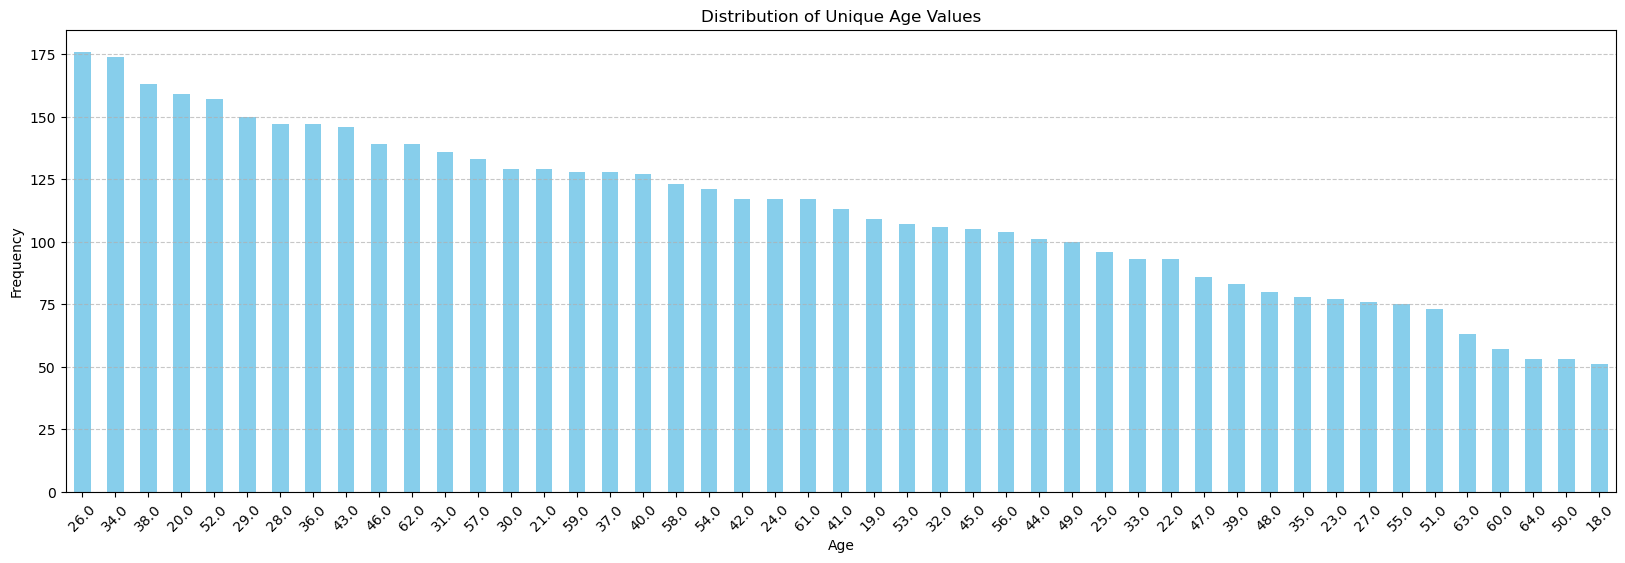

In [17]:
# Plot the distribution of unique values in the 'age' column
unique_values = data['age'].value_counts()

plt.figure(figsize=(20, 6))
unique_values.plot(kind='bar', color='skyblue')

# Add labels and title to the plot
plt.xlabel("Age")
plt.ylabel("Frequency")
plt.title("Distribution of Unique Age Values")
plt.xticks(rotation=45)  # Rotate x-axis labels for better visibility
plt.grid(axis='y', linestyle='--', alpha=0.7)  # Add grid lines for y-axis

plt.show()


In [18]:
4766 / 46 

103.6086956521739

In [17]:
data['age'].mode()

0    26.0
Name: age, dtype: float64

In [19]:
# Count the number of missing values ​​in the column 'age'
missing_count = data['age'].isna().sum()
print(" number of missing values ​​in the column 'age':", missing_count)


 number of missing values ​​in the column 'age': 4766


In [21]:
# Find and count the number of non-repeating (unique) values in the 'age' column
unique_values = data['age'].dropna().unique()
unique_count = len(unique_values)

print("Number of non-repeating values in column 'age':", unique_count)


Number of non-repeating values in column 'age': 47


In [22]:
# Fill missing 'age' values with repeated unique ages
available_ages = data['age'].dropna().unique()
repeated_ages = np.tile(available_ages, (4766 // len(available_ages)) + 1)[:4766]
data.loc[data['age'].isnull(), 'age'] = repeated_ages


In [23]:
data.isna().sum()


id                  0
full_name           0
age                 0
gender              0
device_type         0
ad_position         0
browsing_history    0
time_of_day         0
click               0
dtype: int64

In [24]:
# Count and display the unique values in the 'age' column
unique_values = data['age'].value_counts()

print("Number of unique values in column 'age':", unique_values.count())
print(unique_values)


Number of unique values in column 'age': 47
age
26.0    278
34.0    276
38.0    264
20.0    260
52.0    259
29.0    251
36.0    249
28.0    248
43.0    248
62.0    241
46.0    240
31.0    238
57.0    234
30.0    230
21.0    230
37.0    230
59.0    229
40.0    229
58.0    225
54.0    222
42.0    219
24.0    219
61.0    218
41.0    215
19.0    211
53.0    208
45.0    207
32.0    207
56.0    206
44.0    202
49.0    201
25.0    197
22.0    195
33.0    194
47.0    188
39.0    185
48.0    181
35.0    179
23.0    178
27.0    177
55.0    176
51.0    174
63.0    164
60.0    158
64.0    154
50.0    154
18.0    152
Name: count, dtype: int64


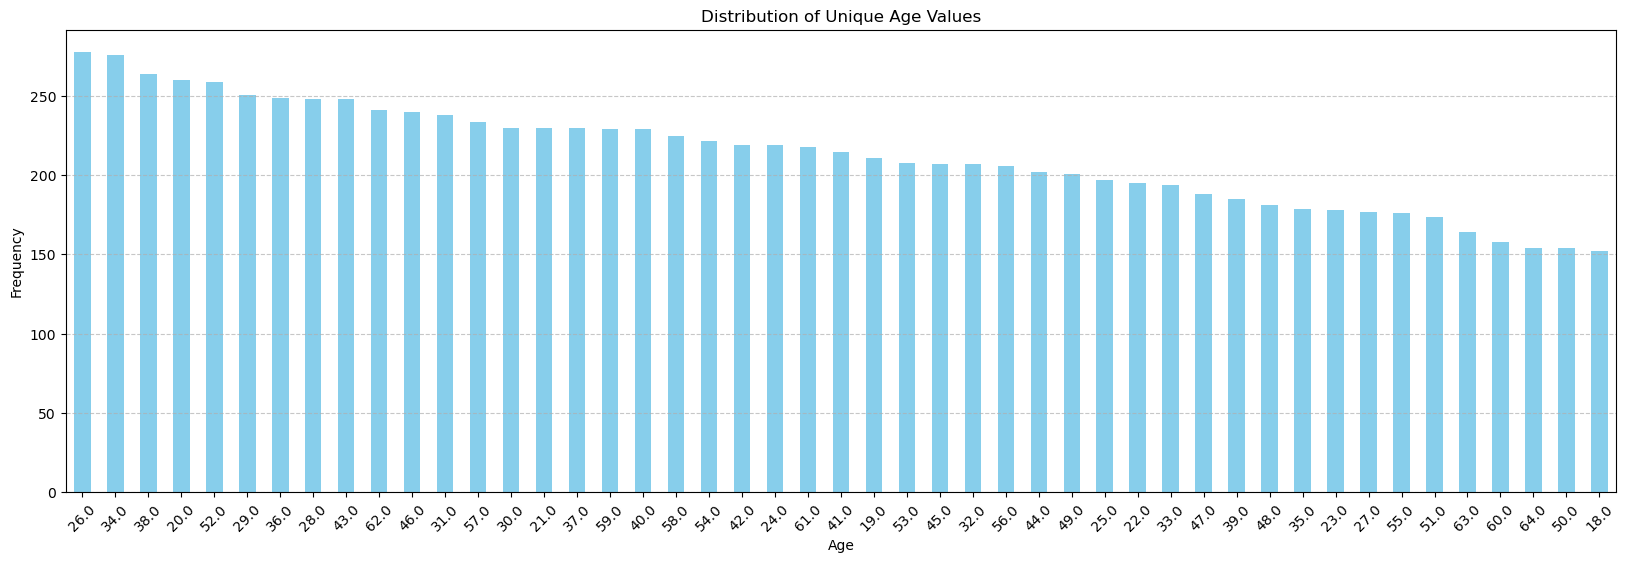

In [25]:
# Plot the distribution of unique values in the 'age' column as a bar chart
unique_values = data['age'].value_counts()

plt.figure(figsize=(20, 6))
unique_values.plot(kind='bar', color='skyblue')

# Add labels and title to the plot
plt.xlabel("Age")
plt.ylabel("Frequency")
plt.title("Distribution of Unique Age Values")
plt.xticks(rotation=45)  # Rotate x-axis labels for better visibility
plt.grid(axis='y', linestyle='--', alpha=0.7)  # Add grid lines for y-axis

plt.show()


### labe encoder

In [26]:
'full_name', 'gender', 'device_type', 'ad_position', 'browsing_history', 'time_of_day'

('full_name',
 'gender',
 'device_type',
 'ad_position',
 'browsing_history',
 'time_of_day')

In [27]:
# Count and display the number of unique values in each column
unique_values_per_column = data.nunique()

print("Number of unique values in each column:")
print(unique_values_per_column)


Number of unique values in each column:
id                  4000
full_name           4000
age                   47
gender                 3
device_type            3
ad_position            3
browsing_history       5
time_of_day            4
click                  2
dtype: int64


In [28]:
# Remove rows where 'gender' is 'Non-Binary' and display unique gender values
data = data[data['gender'] != 'Non-Binary']

print(data['gender'].unique())


['Female' 'Male']


In [29]:
# Encode categorical columns using LabelEncoder
columns_to_transform = ['full_name', 'gender', 'device_type', 'ad_position', 'browsing_history', 'time_of_day']

lbl = LabelEncoder()

for column in columns_to_transform:
    data[column] = lbl.fit_transform(data[column])


In [30]:
# Display the first few rows of the transformed categorical columns
data[columns_to_transform].head()


,full_name,gender,device_type,ad_position,browsing_history,time_of_day
0,2137,0,0,2,3,0
1,762,1,0,2,1,2
3,1651,1,0,0,1,1
6,2563,0,0,2,1,2
7,1526,1,1,1,1,1


In [31]:
# Display correlation values of all columns 
data.corr()['click'].sort_values(ascending=False)


click               1.000000
id                  0.010524
gender              0.005022
full_name          -0.011699
device_type        -0.018060
time_of_day        -0.025195
ad_position        -0.027857
browsing_history   -0.029409
age                -0.041956
Name: click, dtype: float64

In [32]:
# Create interaction features between 'click' and other relevant columns
data['click_age_interaction'] = data['click'] * data['age']
data['click_device_interaction'] = data['click'] * data['device_type']
data['click_ad_position_interaction'] = data['click'] * data['ad_position']
data['click_browsing_history_interaction'] = data['click'] * data['browsing_history']


In [33]:
data.corr()['click'].sort_values(ascending=False)

click                                 1.000000
click_age_interaction                 0.871318
click_browsing_history_interaction    0.616263
click_device_interaction              0.474112
click_ad_position_interaction         0.473401
id                                    0.010524
gender                                0.005022
full_name                            -0.011699
device_type                          -0.018060
time_of_day                          -0.025195
ad_position                          -0.027857
browsing_history                     -0.029409
age                                  -0.041956
Name: click, dtype: float64

### visualisation

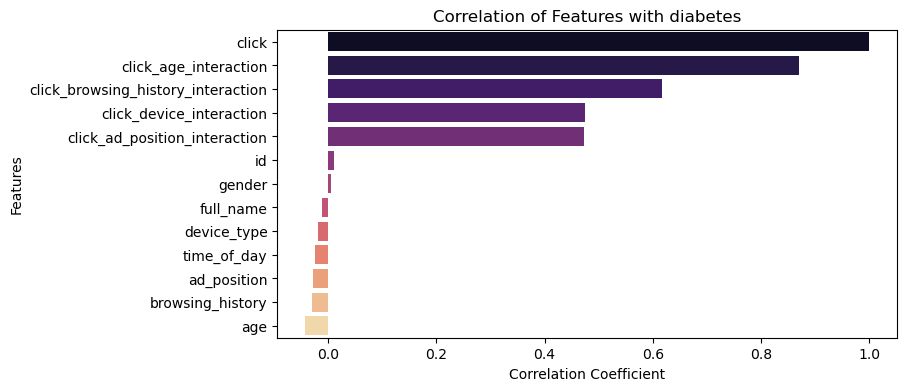

In [37]:
# corelation
corr_with_diabetes = data.corr()['click'].sort_values(ascending=False)

#  barplot
plt.figure(figsize=(8, 4))
sns.barplot(x=corr_with_diabetes.values, y=corr_with_diabetes.index, palette='magma')


plt.title('Correlation of Features with diabetes')
plt.xlabel('Correlation Coefficient')
plt.ylabel('Features')
plt.show()


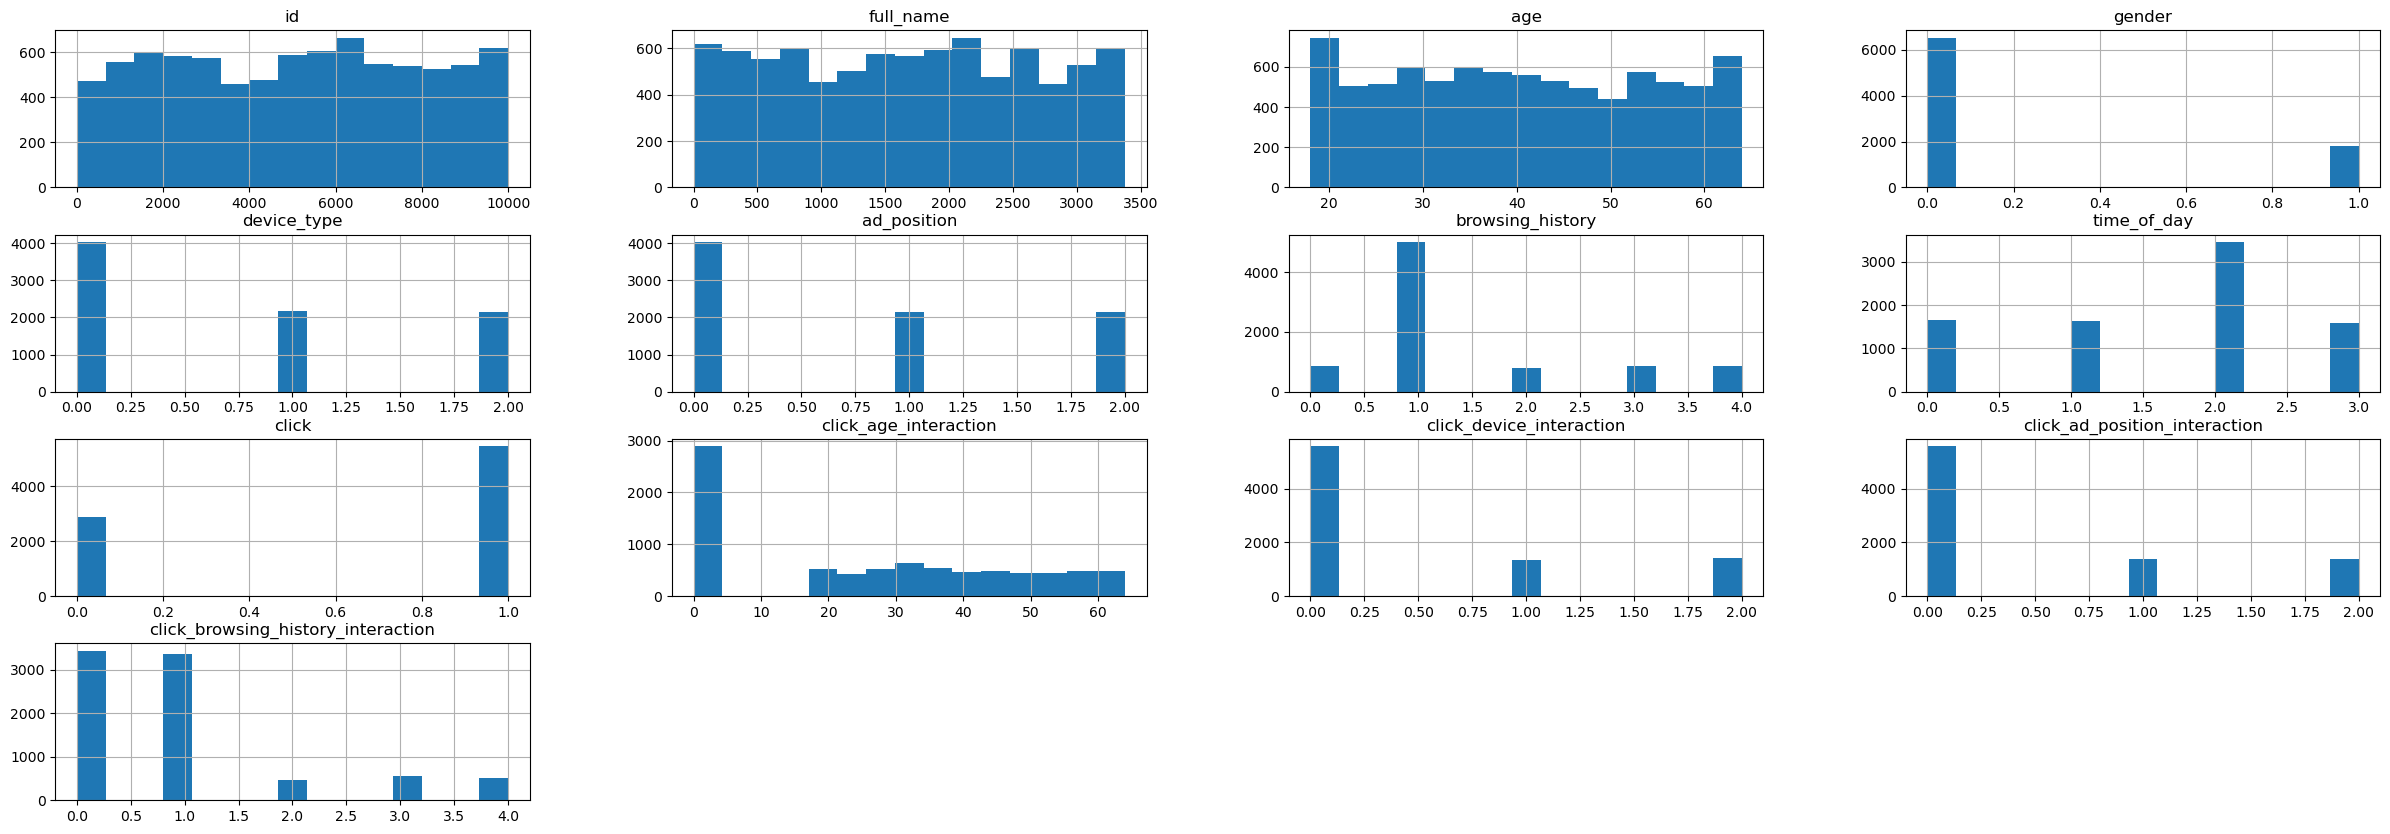

In [38]:
## Histogram Distribution of Numerical Variables in Dataset
data.hist(bins=15, figsize=(30,10))
plt.show()

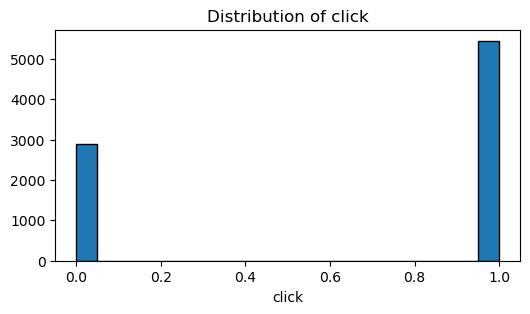

In [39]:
plt.figure(figsize=(6, 3))
plt.hist(data['click'], bins=20, color=None, edgecolor='black')
plt.title('Distribution of click')
plt.xlabel('click')
plt.show()

### model train

In [41]:
# Separate features (X) and target (y) for modeling
X = data.drop('click', axis=1)  
y = data['click']  


In [42]:
# Split data into training and testing sets, and initialize scaler
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
scaler = StandardScaler()


In [43]:
# Scale the training and testing data
X_train = scaler.fit_transform(X_train)  # Fit and transform the training data
X_test = scaler.transform(X_test)  # Transform the test data


In [44]:
# Train a Random Forest Classifier on the training data
clf = RandomForestClassifier(n_estimators=100, random_state=42)  # Initialize the model
clf.fit(X_train, y_train)  # Fit the model to the training data


RandomForestClassifier(random_state=42)

In [45]:
# Predict using the trained model
y_pred_rand_clas = clf.predict(X_test)


In [46]:
# Calculate and print the accuracy of the model
accuracy = accuracy_score(y_test, y_pred_rand_clas)
print(f"Accuracy: {accuracy * 100:.2f}%")


Accuracy: 100.00%


In [47]:
# Display the classification report of the model
print(classification_report(y_test, y_pred_rand_clas))


              precision    recall  f1-score   support

           0       1.00      1.00      1.00       589
           1       1.00      1.00      1.00      1079

    accuracy                           1.00      1668
   macro avg       1.00      1.00      1.00      1668
weighted avg       1.00      1.00      1.00      1668



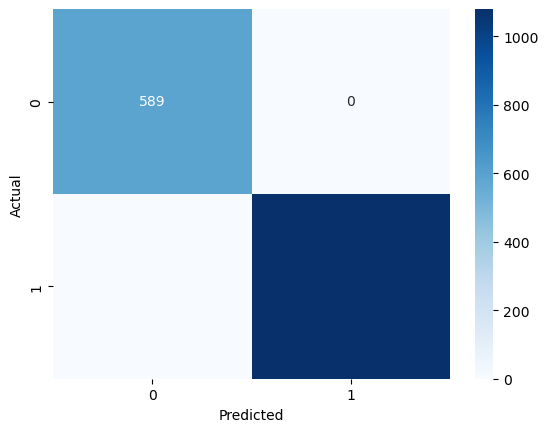

In [48]:
# Plot and display the confusion matrix as a heatmap
conf_matrix = confusion_matrix(y_test, y_pred_rand_clas)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')  # Plot confusion matrix
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


In [49]:
# Train a Gradient Boosting Classifier on the training data
gb_model = GradientBoostingClassifier(n_estimators=100, random_state=42)  # Initialize the model
gb_model.fit(X_train, y_train)  # Fit the model to the training data


GradientBoostingClassifier(random_state=42)

In [50]:
# Predict with the trained Gradient Boosting model
y_pred_gb = gb_model.predict(X_test)


In [51]:
# Print the classification report for the Gradient Boosting model
print("Gradient Boosting Classification Report:")
print(classification_report(y_test, y_pred_gb))


Gradient Boosting Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       589
           1       1.00      1.00      1.00      1079

    accuracy                           1.00      1668
   macro avg       1.00      1.00      1.00      1668
weighted avg       1.00      1.00      1.00      1668



In [52]:
# Calculate and print the accuracy of the Gradient Boosting model
accuracy_gb = accuracy_score(y_test, y_pred_gb)
print(f"Accuracy: {accuracy_gb}")


Accuracy: 1.0


### SVM

In [53]:
# Train a Support Vector Machine (SVM) model on the training data
svm_model = SVC()  # Initialize the SVM model
svm_model.fit(X_train, y_train)  # Fit the model to the training data


SVC()

In [54]:
# Predict with the trained SVM model and print the classification report
y_pred_svm = svm_model.predict(X_test)
print("SVM Classification Report:")
print(classification_report(y_test, y_pred_svm))


SVM Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       589
           1       1.00      1.00      1.00      1079

    accuracy                           1.00      1668
   macro avg       1.00      1.00      1.00      1668
weighted avg       1.00      1.00      1.00      1668



In [55]:
# Calculate and print the accuracy of the SVM model
accuracy_svm = accuracy_score(y_test, y_pred_svm)
print(f"Accuracy: {accuracy_svm}")


Accuracy: 1.0
